In [1]:
import tensorflow as tf
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import cv2
import os

2023-02-14 12:02:49.485020: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-14 12:02:49.792031: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-14 12:02:49.792062: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-14 12:02:51.004213: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
drown_training = "train"
drown_validation = "valid"

In [3]:
training_datagen = ImageDataGenerator(rescale = 1/255, horizontal_flip = True,rotation_range=30,fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale = 1/255)

In [4]:
vehicle_train_generator = training_datagen.flow_from_directory(drown_training,target_size=(224,224),class_mode='categorical',batch_size = 64)
vehicle_validation_generator = validation_datagen.flow_from_directory(drown_validation, target_size=(224,224), class_mode='categorical', batch_size= 16)

Found 819 images belonging to 2 classes.
Found 171 images belonging to 2 classes.


In [5]:
model_drown = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(96, (11,11), strides=(4,4), activation='relu', input_shape=(224,224, 3)),
tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
tf.keras.layers.Conv2D(256, (5,5), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
tf.keras.layers.Conv2D(384, (5,5), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(2048, activation='relu'),
tf.keras.layers.Dropout(0.25),
tf.keras.layers.Dense(1024, activation='relu'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(2, activation='softmax')])
model_drown.compile(loss='categorical_crossentropy',
optimizer=Adam(lr=0.0001),
metrics=['acc'])

2023-02-13 21:06:36.156261: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-13 21:06:36.156661: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/aaditya/miniconda3/envs/tensorgpu/lib/python3.10/site-packages/cv2/../../lib64:
2023-02-13 21:06:36.156695: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/aaditya/miniconda3/envs/tensorgpu/lib/python3.10/site-packages/cv2/../../lib64:
2023-02-13 21:06:36.156725: W tensorflow/compiler/xla/stream_executor/platfor

In [6]:
history = model_drown.fit(vehicle_train_generator,steps_per_epoch = 10,epochs = 100,
                            validation_data = vehicle_validation_generator,validation_steps = 5)

Epoch 1/100
10/10 [==============================] - 13s 1s/step - loss: 0.9881 - acc: 0.7799 - val_loss: 0.4499 - val_acc: 0.8875
Epoch 2/100
10/10 [==============================] - 11s 1s/step - loss: 0.5272 - acc: 0.8054 - val_loss: 0.3627 - val_acc: 0.9125
Epoch 3/100
10/10 [==============================] - 12s 1s/step - loss: 0.5445 - acc: 0.7734 - val_loss: 0.4723 - val_acc: 0.8750
Epoch 4/100
10/10 [==============================] - 12s 1s/step - loss: 0.5360 - acc: 0.7750 - val_loss: 0.4296 - val_acc: 0.8750
Epoch 5/100
10/10 [==============================] - 12s 1s/step - loss: 0.5188 - acc: 0.7844 - val_loss: 0.4153 - val_acc: 0.8875
Epoch 6/100
10/10 [==============================] - 12s 1s/step - loss: 0.5450 - acc: 0.7688 - val_loss: 0.4477 - val_acc: 0.8625
Epoch 7/100
10/10 [==============================] - 11s 1s/step - loss: 0.5432 - acc: 0.7703 - val_loss: 0.4974 - val_acc: 0.8625
Epoch 8/100
10/10 [==============================] - 11s 1s/step - loss: 0.5531 - a

In [7]:
model_drown.save('drowning_detection.h5')

In [7]:
from keras.models import load_model
model_drown = load_model('drowning_detection.h5')

Average Accuracy : 0.8858233886957169


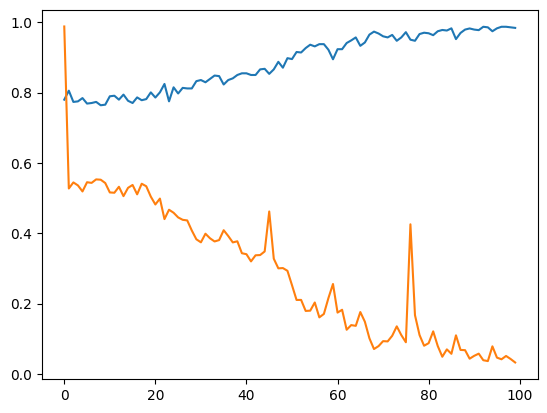

In [9]:
accs = history.history['acc']
print("Average Accuracy :",sum(accs)/len(accs))
plt.plot(accs)

loss = history.history['loss']
plt.plot(loss)

In [8]:
def detect(str,flag):
    if(flag == True):
        return "Detected " + str
    
    else:
        return "Didn't detect " + str

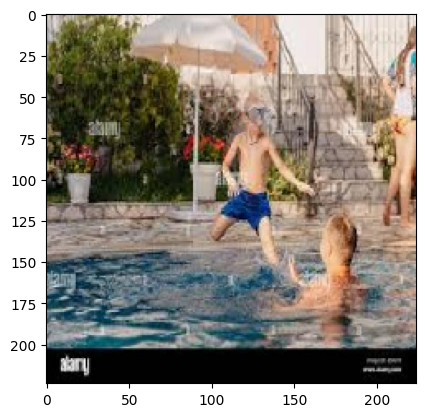

1/1 [==============================] - 0s 49ms/step
Didn't detect Drowning Person


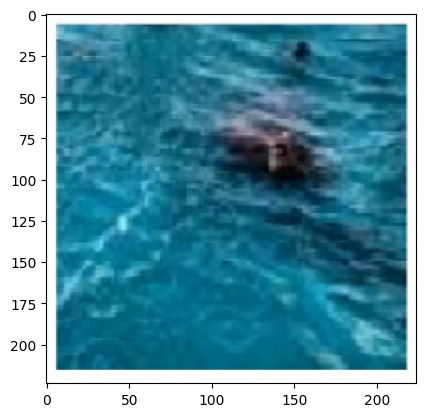

1/1 [==============================] - 0s 34ms/step
Detected Drowning Person


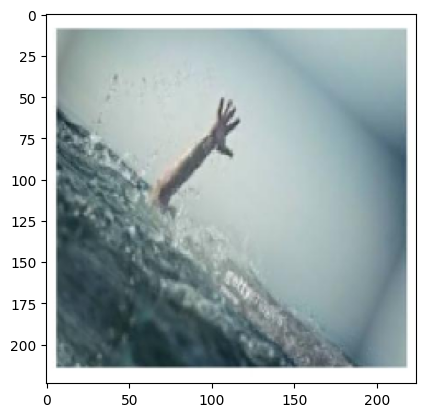

1/1 [==============================] - 0s 30ms/step
Detected Drowning Person


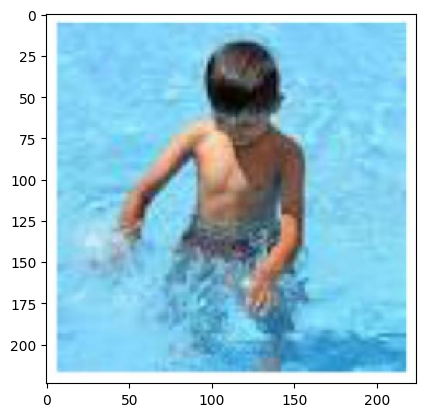

1/1 [==============================] - 0s 30ms/step
Didn't detect Drowning Person


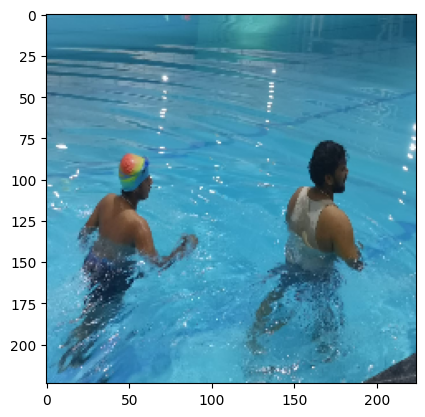

1/1 [==============================] - 0s 32ms/step
Detected Drowning Person


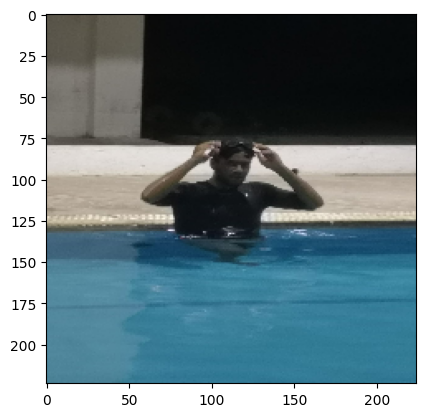

1/1 [==============================] - 0s 30ms/step
Detected Drowning Person


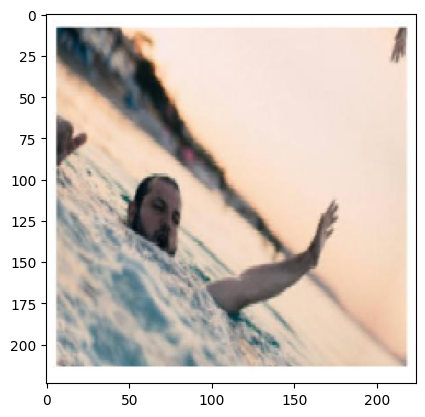

1/1 [==============================] - 0s 45ms/step
Detected Drowning Person


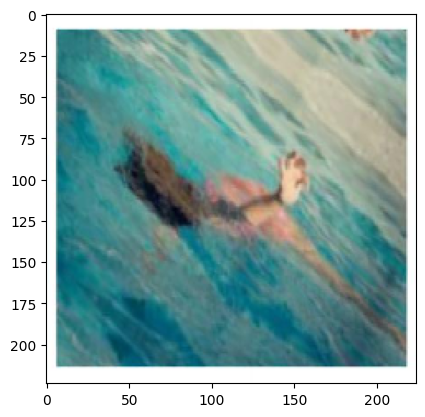

1/1 [==============================] - 0s 32ms/step
Detected Drowning Person


In [10]:
import numpy as np
import os
from matplotlib import pyplot as plt
path = 'test'
for i in os.listdir(path):
    img = image.load_img(path + '/' + i, target_size = (224,224))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0) / 255
    classes = model_drown.predict(x)
    vehicle_flag = detect("Drowning Person",np.argmax(classes[0]) == 0 )
    print(vehicle_flag)